In [2]:
# 导入sns模块
from opendatatools import sns

In [6]:
# 获取微博指数

df, msg = sns.get_weibo_index('贸易战', '1month')   
df.tail(20)

,贸易战
index,
20180713,116184
20180714,82081
20180715,78877
20180716,54992
20180717,58688
20180718,65819
20180719,63334
20180720,56309
20180721,49397


### 关键词：

1. 贸易战

2. 疫苗

3. 世界杯



In [10]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import datetime
def plot_trend(keywords):
    
    plt.figure(figsize=(14, 8))

    for keyword in keywords:
        df, msg = sns.get_weibo_index(keyword, '3month')    

        time   = [datetime.datetime.strptime(x, "%Y%m%d") for x in df.index]
        values = [float(x) for x in df[df.columns[0]]] 
        plt.plot(time, values, label=keyword)
    
    plt.xlabel("日期")
    plt.ylabel("热度")
    plt.title('微博指数')
    plt.legend()
    plt.show()

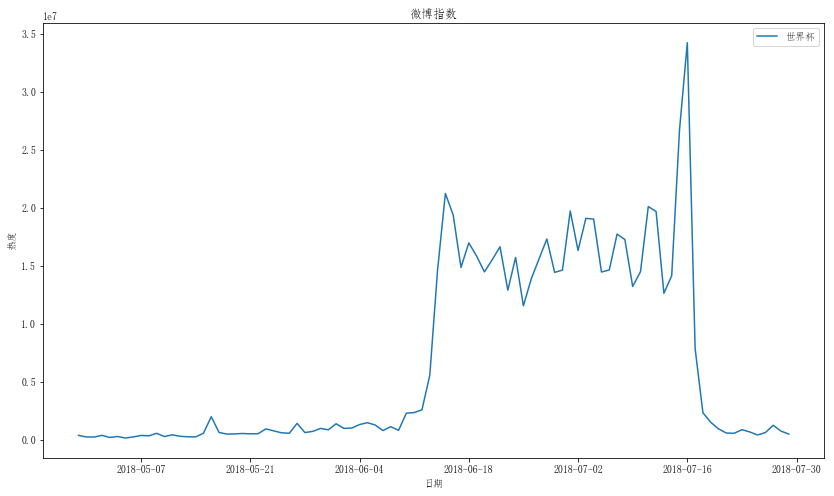

In [15]:
plot_trend(['世界杯'])

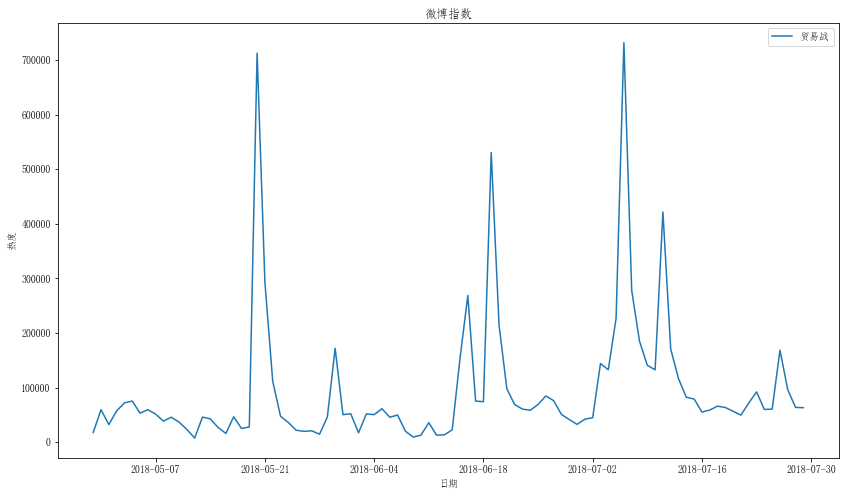

In [18]:
plot_trend(['贸易战'])

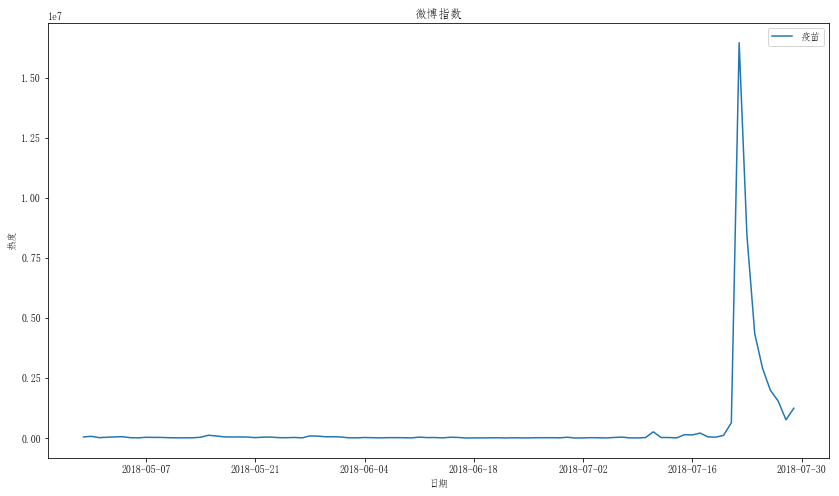

In [21]:
plot_trend(['疫苗'])

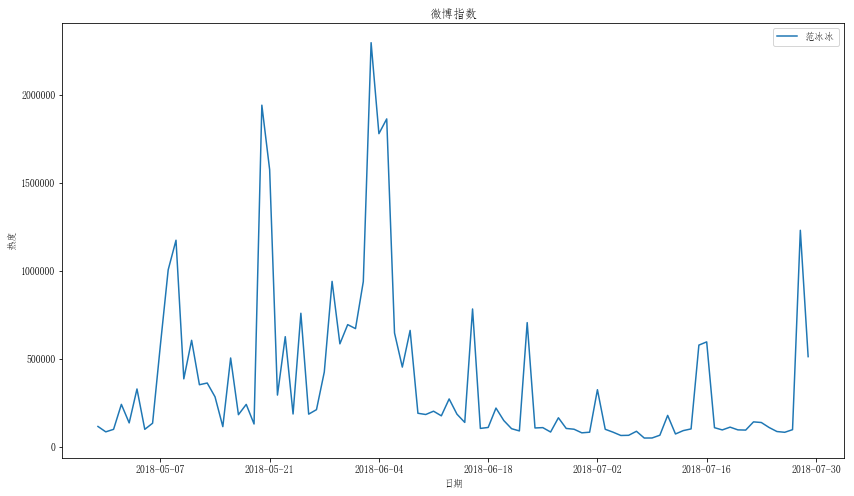

In [22]:
plot_trend(['范冰冰'])

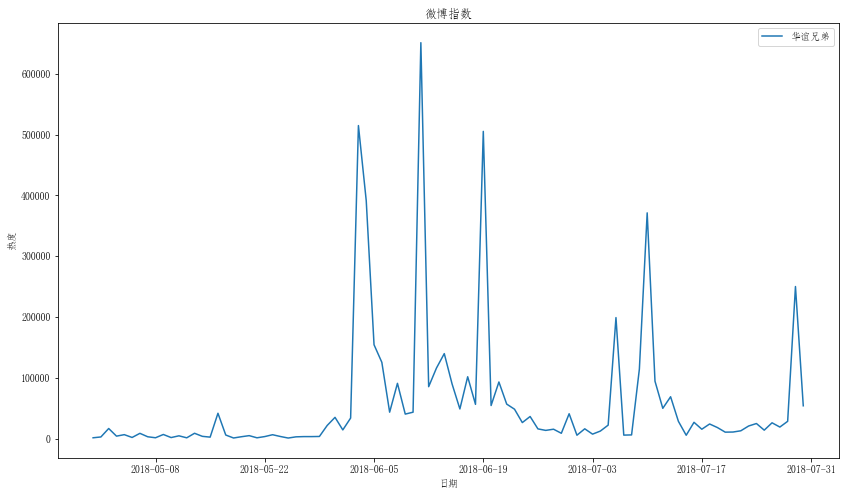

In [23]:
plot_trend(['华谊兄弟'])

In [28]:
from opendatatools import stock
stock.set_proxies({"https" : "https://127.0.0.1:1080"})

In [31]:
df_stock,msg = stock.get_daily('300327.SZ', '2018-05-01', '2018-07-30')
df_weibo_index, msg = sns.get_weibo_index('华谊兄弟', '3month')

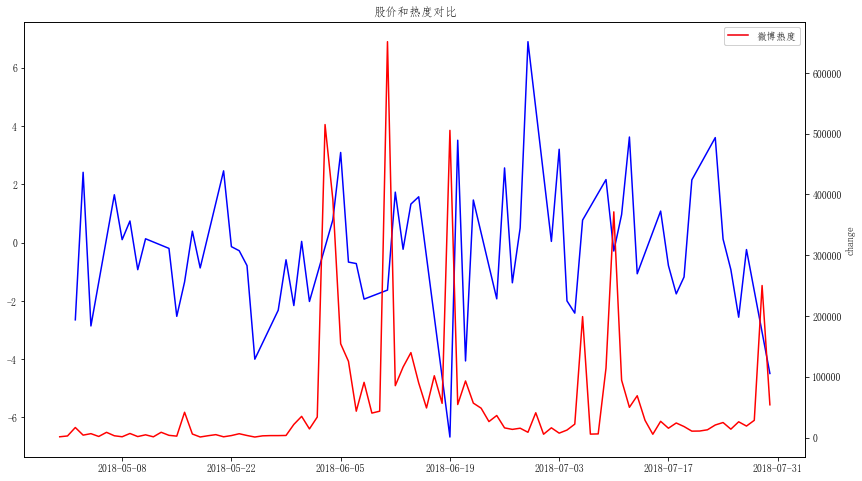

In [51]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(14, 8))

ax = plt.subplot(1,1,1)

time   = [x for x in df_stock['time']]
values = [float(x) for x in df_stock['percent'] ]
ax.plot(time, values, label='股价涨跌', color='blue')
ax.legend()

ax2 = ax.twinx()
time   = [datetime.datetime.strptime(x, "%Y%m%d") for x in df_weibo_index.index]
values = [float(x) for x in df_weibo_index[df_weibo_index.columns[0]]] 
ax2.plot(time, values, label='微博热度', color='red')
ax2.legend()

plt.xlabel("日期")
plt.ylabel("change")
plt.title('股价和热度对比')
plt.legend()
plt.show()